In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
df=pd.read_csv('IRIS.csv')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
df['species']=df['species'].astype('category')
df['species']=df['species'].cat.codes

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<Axes: >

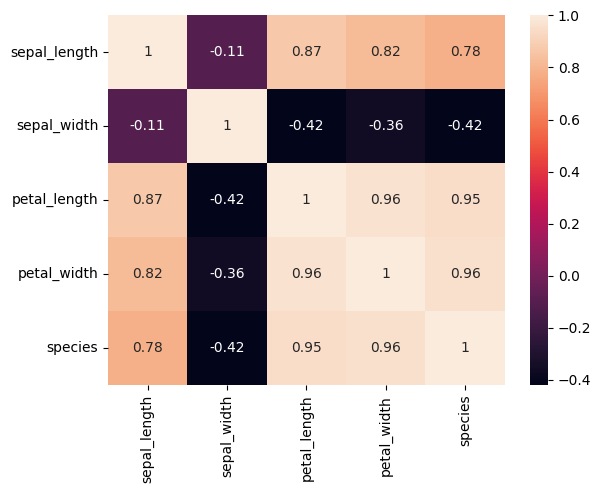

In [23]:
correaltion_matrix=df.corr()
sns.heatmap(data=correaltion_matrix,annot=True) ## value sathe annot

<Axes: >

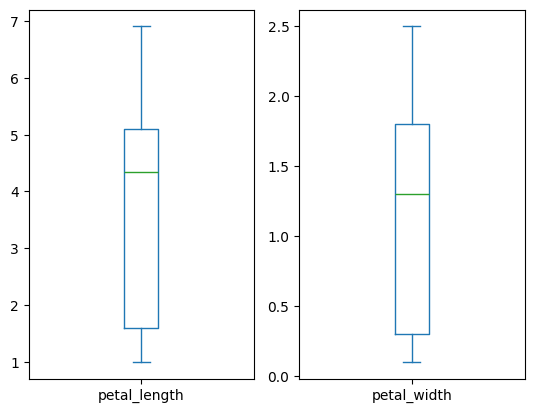

In [24]:
plt.subplot(1,2,1)
df['petal_length'].plot.box()

plt.subplot(1,2,2)
df['petal_width'].plot.box()

In [25]:
x=df[['petal_length','petal_width']]
y=df['species']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred=model.predict(x_test)

In [29]:
y_test.head()

7     0
12    0
83    1
15    0
46    0
Name: species, dtype: int8

In [30]:
y_pred

array([0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 2, 2, 1, 0, 2, 1, 0], dtype=int8)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0  8  2]
 [ 0  1  8]]


In [32]:
print('TN',cm[0,0])
print('FP',cm[0,1])
print('FN',cm[1,0])
print('TP',cm[1,1])

TN 11
FP 0
FN 0
TP 8


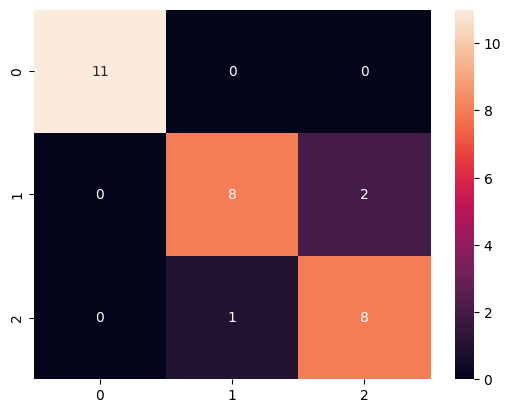

In [35]:
dataplot=sns.heatmap(data=cm,annot=True)
plt.show()

In [36]:
#Accuracy= TP+TN/TP+TN+FP+FN 
#from sklearn import accuracy_score
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_pred)
print('The accuracy value : ', a*100)

The accuracy value :  90.0


In [37]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean square error is : ",(mse*100).round(2), ' %')

Mean square error is :  10.0  %


In [38]:
rmse=np.sqrt(mse)
print("Root mean square error is : ",(rmse*100).round(2),' %')

Root mean square error is :  31.62  %


In [39]:
r2_score=model.score(x_test,y_test)
print("R2 score is : ",r2_score)

R2 score is :  0.9
